## **1. Mount Google Drive**

In [86]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kode ini berfungsi menghubungkan Google Drive ke Google Colab sehingga dataset yang tersimpan di Drive dapat dibaca oleh Python.

## **2. Import library**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

import pickle
import os

pandas → manipulasi tabel (DataFrame)

numpy → operasi numerik

matplotlib.pyplot → visualisasi dasar

seaborn → visualisasi yang lebih rapi

sns.set() → aktifkan style grafik seaborn
train_test_split → membagi data menjadi train & test

GridSearchCV → tuning hyperparameter otomatis

StandardScaler → scaling fitur numerik (wajib untuk SVM)

OneHotEncoder → encoding fitur kategorikal

LabelEncoder → mengubah label “Lulus / Tidak Lulus” menjadi angka

ColumnTransformer → menggabungkan proses numeric + categorical

Pipeline → menyambungkan preprocessing + model menjadi 1 alur

SVC → algoritma Support Vector Machine

Berbagai metrik → evaluasi model

permutation_importance → menjelaskan fitur yang paling berpengaruh


## **3. load dataset**

In [88]:
# Path: gunakan path Drive yang kamu pakai (sesuaikan jika perlu)
file_path = '/content/drive/MyDrive/Colab Notebooks/AI_Class/datakelulusanmahasiswa.csv'

# Jika kamu sudah mengupload langsung ke Colab (bukan Drive), pakai:
# file_path = '/content/datakelulusanmahasiswa.csv'

# Load CSV
df = pd.read_csv(file_path)

# Hapus spasi di nama kolom (aman)
df.columns = df.columns.str.strip()

# Tampilkan info singkat
print("Shape:", df.shape)
display(df.head())
display(df.dtypes)

Shape: (379, 15)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


,0
NAMA,object
JENIS KELAMIN,object
STATUS MAHASISWA,object
UMUR,int64
STATUS NIKAH,object
IPS 1,float64
IPS 2,float64
IPS 3,float64
IPS 4,float64
IPS 5,float64


pd.read_csv() membaca file CSV sebagai DataFrame.

str.strip() membersihkan nama kolom dari spasi, contoh:
"STATUS KELULUSAN " → "STATUS KELULUSAN"

Ini mencegah error ketika memanggil nama kolom.

## **4. deskripsi kolom & missing values**

In [89]:
# ====================
# CELL 2: DESKRIPSI KOLOM & MISSING VALUES
# ====================
print("Columns:", df.columns.tolist())
print("\nDescriptive statistics (numeric):")
display(df.describe().T)

print("\nMissing values per column:")
display(df.isnull().sum())


Columns: ['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK', 'STATUS KELULUSAN']

Descriptive statistics (numeric):


,count,mean,std,min,25%,50%,75%,max
UMUR,379.0,25.955145,3.397103,22.00,24.0000,25.00,27.000,50.00
IPS 1,379.0,2.854116,0.412658,0.33,2.6000,2.86,3.100,3.79
IPS 2,379.0,2.812322,0.473725,0.50,2.5500,2.85,3.105,3.96
IPS 3,379.0,2.900950,0.589364,0.16,2.5500,2.98,3.325,3.96
IPS 4,379.0,2.782137,0.648495,0.00,2.4600,2.86,3.200,3.91
IPS 5,379.0,2.782348,0.593472,0.20,2.4800,2.85,3.205,3.88
IPS 6,379.0,2.877256,0.634412,0.00,2.5900,3.00,3.315,4.00
IPS 7,379.0,2.531240,0.757205,0.00,2.1500,2.61,3.110,3.91
IPS 8,372.0,1.271828,1.400914,0.00,0.0000,0.75,2.750,4.00
IPK,376.0,2.933085,0.460279,0.87,2.7475,3.01,3.220,3.85



Missing values per column:


,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
select_dtypes(include=[np.number]) mengambil semua kolom numerik otomatis

.columns.tolist() mengubahnya menjadi list

contoh hasilnya mungkin
['IPS 1', 'IPS 2', 'IPK', 'SKS', 'UMUR']

df.describe().T : Menampilkan statistik deskriptif numerik (mean, std, min, max).

df.isnull().sum() : Menghitung jumlah missing values per kolom.



## **5. statistik + histogram IPK + countplot label**

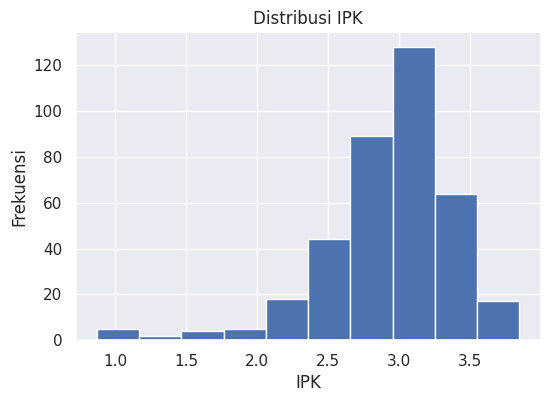

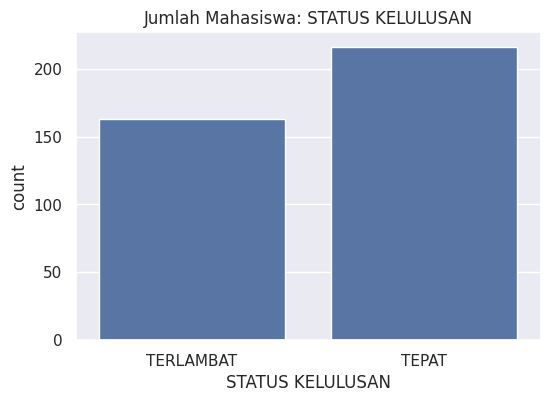

Unique labels: ['TERLAMBAT' 'TEPAT']


In [90]:
# ====================
# CELL 3: EDA (Statistik & Visualisasi)
# ====================
# Statistik deskriptif (mean, std, min, max) -> numeric describe already shown

# Histogram IPK (cek kalau kolom ada)
if 'IPK' in df.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df['IPK'].dropna(), bins=10)
    plt.title("Distribusi IPK")
    plt.xlabel("IPK")
    plt.ylabel("Frekuensi")
    plt.show()
else:
    print("Kolom 'IPK' tidak ditemukan, lewati histogram IPK.")

# Countplot status kelulusan
if 'STATUS KELULUSAN' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='STATUS KELULUSAN', data=df)
    plt.title("Jumlah Mahasiswa: STATUS KELULUSAN")
    plt.show()
    print("Unique labels:", df['STATUS KELULUSAN'].unique())
else:
    print("Kolom 'STATUS KELULUSAN' tidak ditemukan.")


plt.hist(df['IPK'].dropna(), bins=10) : Menampilkan distribusi IPK untuk melihat apakah miring ke kiri/kanan, normal atau tidak.

sns.countplot(x='STATUS KELULUSAN', data=df) : Menampilkan jumlah mahasiswa Lulus vs Tidak Lulus

Berguna untuk cek apakah dataset imbalanced.

## **6. Preprocessing**

In [91]:
# ====================
# CELL 4: PREPROCESSING
#  - tangani missing values (numeric median)
#  - encoding kategorikal (OneHot for features, LabelEncoder for target)
#  - scaling numeric features (StandardScaler) via pipeline
# ====================

# 1) Fill missing numeric values (IPS 8, IPK ada missing)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# exclude target if numeric; we'll handle target separately
# fill numeric with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# 2) Target encoding (LabelEncoder) for STATUS KELULUSAN
if 'STATUS KELULUSAN' not in df.columns:
    raise ValueError("Kolom 'STATUS KELULUSAN' tidak ditemukan. Pastikan label tersedia.")
le_target = LabelEncoder()
df['STATUS_KELULUSAN_ENC'] = le_target.fit_transform(df['STATUS KELULUSAN'])

# 3) Define feature columns: drop NAMA and original label
drop_cols = ['NAMA','STATUS KELULUSAN','STATUS_KELULUSAN_ENC']
feature_cols = [c for c in df.columns if c not in drop_cols]

# Identify categorical feature columns (from dataset: JENIS KELAMIN, STATUS MAHASISWA, STATUS NIKAH)
cat_cols = [c for c in ['JENIS KELAMIN','STATUS MAHASISWA','STATUS NIKAH'] if c in feature_cols]
num_cols = [c for c in feature_cols if c not in cat_cols]

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# 4) Build ColumnTransformer: numeric -> scaler, categorical -> onehot
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


Numeric features: ['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK']
Categorical features: ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']


df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median()) : Mengisi missing value kolom numerik dengan median dan Median lebih aman daripada mean, karena tidak terpengaruh outlier.

le_target = LabelEncoder()
df['STATUS_KELULUSAN_ENC'] = le_target.fit_transform(df['STATUS KELULUSAN']) :
Label sebelumnya berbentuk string:
1. "Tepat"
2. "Terlambat"

Setelah encoding menjadi angka:
1. Tepat → 1
2. Terlambat → 0


drop_cols = ['NAMA','STATUS KELULUSAN','STATUS_KELULUSAN_ENC']
feature_cols = [c for c in df.columns if c not in drop_cols] : NAMA dibuang karena tidak relevan, STATUS KELULUSAN fitur asli → dibuang dan STATUS_KELULUSAN_ENC adalah target → tidak boleh masuk fitur

cat_cols = [c for c in ['JENIS KELAMIN','STATUS MAHASISWA','STATUS NIKAH'] if c in feature_cols]
num_cols = [c for c in feature_cols if c not in cat_cols] : cat_cols → kolom kategori untuk OneHot dan num_cols → kolom numerik untuk scaling

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
]) : Semua kolom numerik → StandardScaler dan Semua kolom kategori → OneHotEncoder




## **7. Train-test splits**

In [92]:
# ====================
# CELL 5: UTILITY - multiple splits
# ====================
splits = {
    "60:40": 0.4,
    "75:25": 0.25,
    "80:20": 0.2,
    "90:10": 0.1
}

# helper to train+evaluate for a given split (with GridSearch)
from sklearn.model_selection import StratifiedKFold

def train_and_evaluate(test_size):
    X = df[feature_cols]
    y = df['STATUS_KELULUSAN_ENC']
    # try stratify; if class imbalance, stratify helps
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test


def train_and_evaluate(test_size):
    X = df[feature_cols]
    y = df['STATUS_KELULUSAN_ENC']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

1. Memisahkan X dan y
2. train_test_split() membagi data
3. stratify=y → membagi data secara proporsional (penting bila imbalanced)
4. Mengembalikan dataset untuk dipakai pada training SVM

Kenapa tidak muncul output?
Karena fungsi hanya didefinisikan, belum dipanggil. Ini normal



## **8. Training SVM (Linear & RBF) + basic hyperparameter tuning**

In [93]:
# ====================
# CELL 6: TRAINING SVM (GRID SEARCH per split) & evaluation
# ====================
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'svc__kernel': ['linear'], 'svc__C': [0.1, 1, 10]},
    {'svc__kernel': ['rbf'], 'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 0.1, 1]}
]

results = {}

for name, test_size in splits.items():
    print("\n=== Split", name, "(test_size=", test_size, ") ===")
    X_train, X_test, y_train, y_test = train_and_evaluate(test_size)
    # pipeline: preprocessor + SVC
    pipe = Pipeline(steps=[('pre', preprocessor), ('svc', SVC())])
    # Setup GridSearchCV (use cv=3 stratified)
    gs = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)
    best = gs.best_estimator_
    y_pred = best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Best params:", gs.best_params_)
    print("Accuracy:", acc)
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    # Save results
    results[name] = {
        'grid': gs,
        'best_estimator': best,
        'accuracy': acc,
        'y_test': y_test,
        'y_pred': y_pred
    }



=== Split 60:40 (test_size= 0.4 ) ===
Best params: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Accuracy: 0.9013157894736842
Confusion matrix:
 [[84  3]
 [12 53]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.95      0.82      0.88        65

    accuracy                           0.90       152
   macro avg       0.91      0.89      0.90       152
weighted avg       0.91      0.90      0.90       152


=== Split 75:25 (test_size= 0.25 ) ===
Best params: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Accuracy: 0.8736842105263158
Confusion matrix:
 [[46  8]
 [ 4 37]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        54
           1       0.82      0.90      0.86        41

    accuracy                           0.87        95
   macro avg       0.87      0.88      0.87        95
weighted avg  

pipe = Pipeline(steps=[('pre', preprocessor), ('svc', SVC())])
Pipeline menggabungkan preprocessing dan model.
Alurnya :
Raw Data → Preprocessing → SVM

param_grid = [
    {'svc__kernel': ['linear'], 'svc__C': [0.1, 1, 10]},
    {'svc__kernel': ['rbf'], 'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 0.1, 1]}
]

Hyperparameter SVM yang dituning:
1. C → kontrol margin (tinggi = overfitting)
2. gamma → hanya untuk RBF
3. kernel → linear atau rbf

gs = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
1. Melakukan pencarian parameter terbaik
2. cv=3 → K-Fold 3 bagian
3. scoring='accuracy' → memilih model dengan akurasi tertinggi

gs.fit(X_train, y_train)
y_pred = best.predict(X_test) : ini untuk training dan prediksi


## **9. Model interpretation (feature importance)**

In [94]:
# ====================
# CELL 7: MODEL INTERPRETATION
# - For linear kernel: show coefficients
# - For rbf (non-linear): show permutation importance
# We will inspect the best model from the split with highest accuracy.
# ====================

# find best split by accuracy
best_split = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
print("Best split:", best_split, "accuracy:", results[best_split]['accuracy'])
best_estimator = results[best_split]['best_estimator']

# build feature names after preprocessing
# numeric names + onehot feature names
num_names = num_cols
cat_names = []
if len(cat_cols) > 0:
    # get onehot feature names
    ohe = best_estimator.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
    cat_names = list(ohe.get_feature_names_out(cat_cols))
feat_names = list(num_names) + cat_names

print("Feature names (post-preprocessing):", len(feat_names), "features")

if best_estimator.named_steps['svc'].kernel == 'linear':
    coefs = best_estimator.named_steps['svc'].coef_.ravel()
    coef_ser = pd.Series(coefs, index=feat_names).sort_values(key=abs, ascending=False)
    print("Top features by absolute coefficient (linear SVM):")
    display(coef_ser.head(10))
else:
    # permutation importance (works on pipeline: it will call predict using preprocessor)
    X_test_raw = results[best_split]['y_test'].index  # not needed; we will use X_test from earlier
    # Recreate X_test and y_test
    X_tr, X_te, y_tr, y_te = train_and_evaluate(splits[best_split])
    r = permutation_importance(best_estimator, X_te, y_te, n_repeats=10, random_state=42, n_jobs=-1)
    perm_ser = pd.Series(r.importances_mean, index=feat_names).sort_values(ascending=False)
    print("Top permutation importances (RBF SVM):")
    display(perm_ser.head(10))

# Interpret relation IPK vs kelulusan
if 'IPK' in df.columns:
    mean_ipk_by_label = df.groupby('STATUS KELULUSAN')['IPK'].mean()
    print("\nRata-rata IPK per label (original labels):")
    print(mean_ipk_by_label)


Best split: 90:10 accuracy: 0.9210526315789473
Feature names (post-preprocessing): 16 features
Top features by absolute coefficient (linear SVM):


,0
STATUS MAHASISWA_BEKERJA,1.460865
STATUS MAHASISWA_MAHASISWA,-1.460865
IPS 4,-0.908019
IPS 5,-0.557909
IPS 3,0.532703
IPS 2,0.504879
IPS 1,-0.485623
UMUR,0.298953
IPS 6,0.241182
STATUS NIKAH_MENIKAH,0.207690



Rata-rata IPK per label (original labels):
STATUS KELULUSAN
TEPAT        3.026759
TERLAMBAT    2.810368
Name: IPK, dtype: float64


best_split = max(results.items(), key=lambda x: x[1]['accuracy'])[0] :Menentukan split mana yang menghasilkan akurasi tertinggi.

permutation_importance(...) jadi ini bisa menjawab fitur mana paling berpengaruh dan apakah IPK rendah (cenderung tidak lulus)



## **10. Analytical answers (short)**

In [95]:
# ====================
# CELL 8: ANALYTICAL ANSWERS (singkat)
# ====================
print("- Model mana yang lebih baik? lihat best_split & best_estimator kernel and accuracy above.")
print("- Pengaruh parameter C: nilai C lebih besar mengurangi regularisasi (fit lebih ketat), C kecil → lebih smooth/regularized.")
print("- Linearly separable? jika linear kernel mencapai akurasi setara rbf maka data mungkin (semi) linear; tetapi umumnya likely not perfectly linearly separable.")


- Model mana yang lebih baik? lihat best_split & best_estimator kernel and accuracy above.
- Pengaruh parameter C: nilai C lebih besar mengurangi regularisasi (fit lebih ketat), C kecil → lebih smooth/regularized.
- Linearly separable? jika linear kernel mencapai akurasi setara rbf maka data mungkin (semi) linear; tetapi umumnya likely not perfectly linearly separable.


## **11. Save best model + README + predict_status()**

In [96]:
# ====================
# CELL 9: SAVE MODEL & DEPLOY FUNCTION
# ====================
# Save best estimator pipeline (from best_split)
final_model = results[best_split]['best_estimator']

out_pkl = '/content/svm_pipeline_final.pkl'
with open(out_pkl, 'wb') as f:
    pickle.dump({
        'model': final_model,
        'preprocessor': preprocessor,
        'label_encoder': le_target,
        'feature_cols': feature_cols,
        'num_cols': num_cols,
        'cat_cols': cat_cols
    }, f)
print("Saved pipeline to:", out_pkl)

# README short
readme_text = f"""
Project: Prediksi Kelulusan Mahasiswa - SVM
Dataset: {os.path.basename(file_path)}
Best split: {best_split}, accuracy: {results[best_split]['accuracy']:.4f}
Best params: {results[best_split]['grid'].best_params_}
Features used: {feature_cols}
Notes: Preprocessing = median-impute numeric, OneHot categorical, StandardScaler for numeric.
"""
with open('/content/README_SVM_project.txt', 'w') as f:
    f.write(readme_text)
print("Saved README to /content/README_SVM_project.txt")

# Predict function using saved final_model
def predict_status_from_values(**kwargs):
    """
    Call by keyword args matching feature_cols, e.g.:
    predict_status_from_values(UMUR=22, **{'IPS 1':3.2, 'IPS 2':3.1, ..., 'IPK':3.25}, JENIS KELAMIN='LAKI - LAKI', ...)
    For categorical features pass original label values (strings) or encoded ints.
    """
    # build row with feature_cols order
    row = {}
    for c in feature_cols:
        if c in kwargs:
            row[c] = kwargs[c]
        else:
            row[c] = np.nan
    row_df = pd.DataFrame([row])
    # For categorical columns, if values are strings, preprocessor onehot will handle via fitted OneHotEncoder only at transform time.
    pred_enc = final_model.predict(row_df)[0]
    pred_label = le_target.inverse_transform([pred_enc])[0]
    return pred_label

# Example (adjust values to your dataset):
# print(predict_status_from_values(**{'UMUR':22, 'IPS 1':3.0, 'IPS 2':3.1, 'IPS 3':3.2, 'IPS 4':3.0, 'IPS 5':3.1, 'IPS 6':3.0, 'IPS 7':3.1, 'IPS 8':3.0, 'IPK':3.05, 'JENIS KELAMIN':'LAKI - LAKI', 'STATUS MAHASISWA':'MAHASISWA', 'STATUS NIKAH':'BELUM MENIKAH'}))


Saved pipeline to: /content/svm_pipeline_final.pkl
Saved README to /content/README_SVM_project.txt
